In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


# **Data Cleaning and Preprocessing**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [6]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [7]:
df.size

7085

In [8]:
df.shape

(545, 13)

<Axes: >

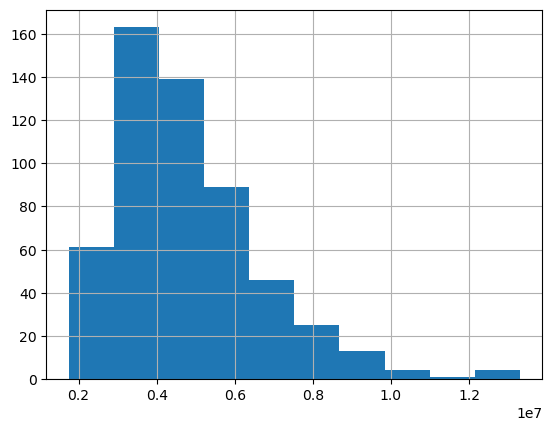

In [9]:
df['price'].hist()

In [10]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [11]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


# **Exploratory Data Analysis**

In [12]:
df['basement'].value_counts()

basement
no     354
yes    191
Name: count, dtype: int64

In [13]:
df['mainroad'].value_counts()

mainroad
yes    468
no      77
Name: count, dtype: int64

In [14]:
df['guestroom'].value_counts()

guestroom
no     448
yes     97
Name: count, dtype: int64

In [15]:
df['hotwaterheating'].value_counts()

hotwaterheating
no     520
yes     25
Name: count, dtype: int64

In [16]:
df['airconditioning'].value_counts()

airconditioning
no     373
yes    172
Name: count, dtype: int64

In [17]:
df['prefarea'].value_counts()

prefarea
no     417
yes    128
Name: count, dtype: int64

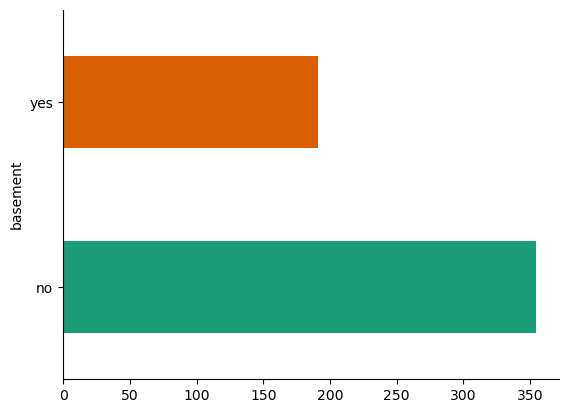

In [18]:
df.groupby('basement').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

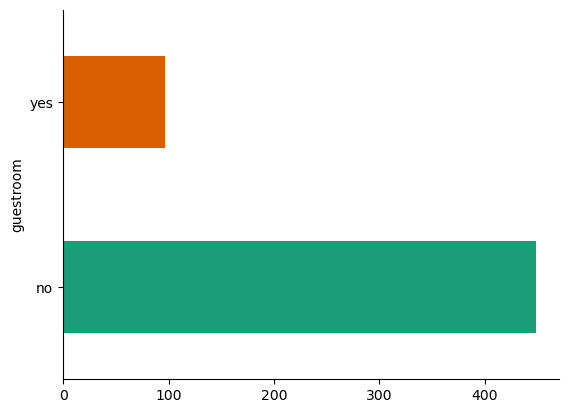

In [19]:
df.groupby('guestroom').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

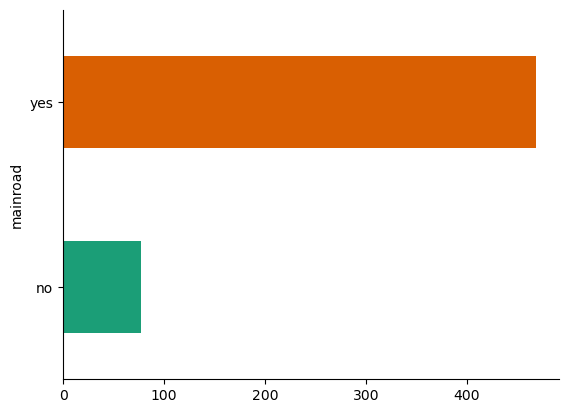

In [20]:
df.groupby('mainroad').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

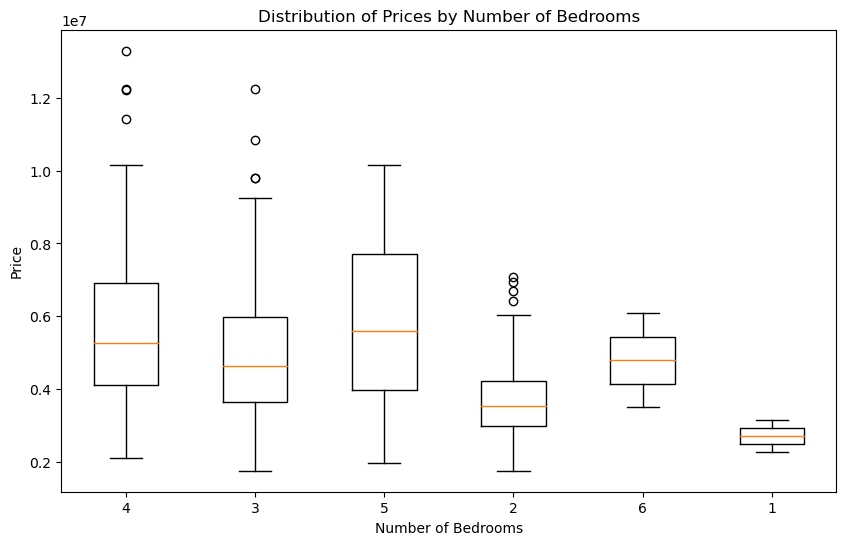

In [21]:
plt.figure(figsize=(10, 6))
plt.boxplot([df[df['bedrooms'] == i]['price'] for i in df['bedrooms'].unique()], labels=df['bedrooms'].unique())
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
_ = plt.title('Distribution of Prices by Number of Bedrooms')

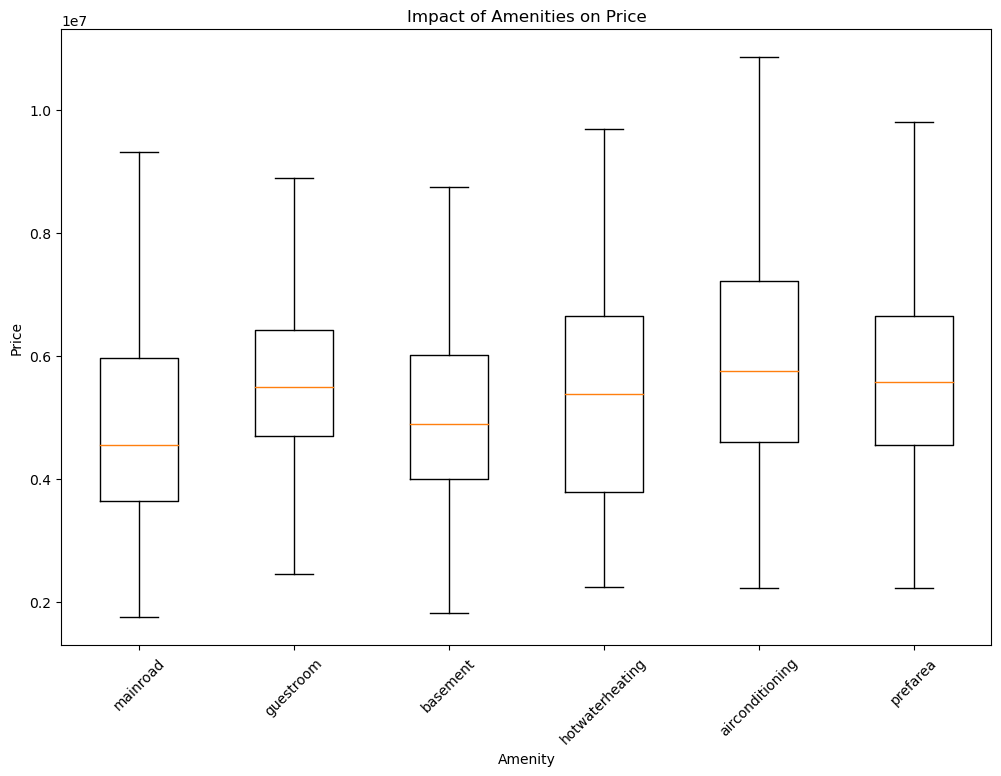

In [22]:
amenities = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

plt.figure(figsize=(12, 8))
plt.boxplot([df[df[amenity] == 'yes']['price'] for amenity in amenities],
            labels=amenities, showfliers=False)
plt.xlabel('Amenity')
plt.ylabel('Price')
plt.title('Impact of Amenities on Price')
_ = plt.xticks(rotation=45)

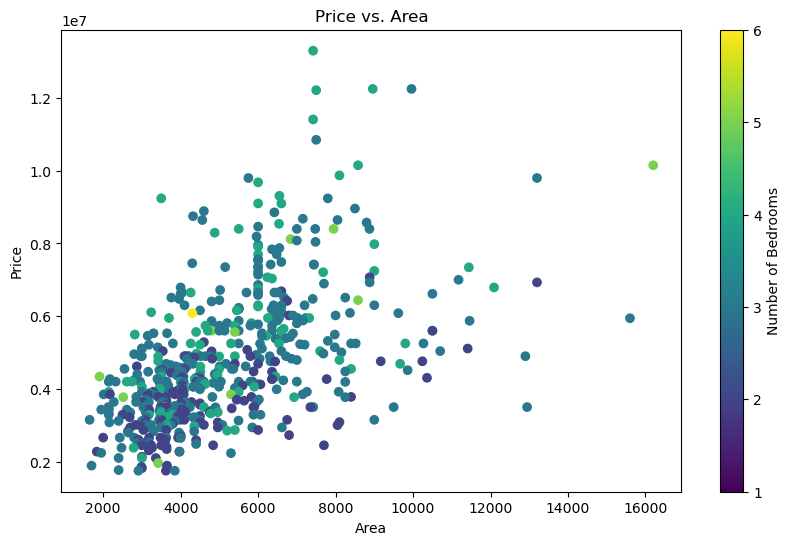

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df['area'], df['price'], c=df['bedrooms'], cmap='viridis')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs. Area')
_ = plt.colorbar(label='Number of Bedrooms')

<Figure size 1000x600 with 0 Axes>

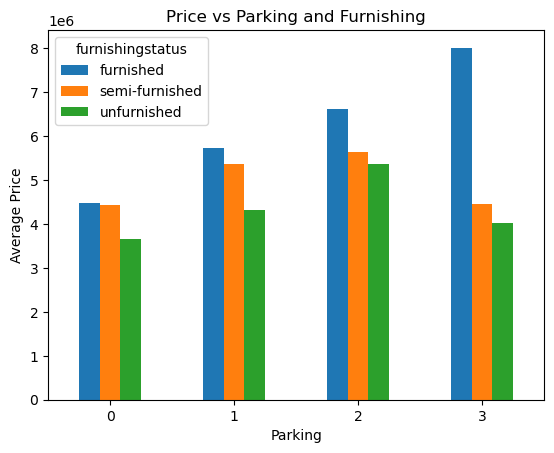

In [24]:
avg_price = df.groupby(['parking', 'furnishingstatus'])['price'].mean().unstack()

plt.figure(figsize=(10, 6))
avg_price.plot(kind='bar')
plt.xlabel('Parking')
plt.ylabel('Average Price')
plt.title('Price vs Parking and Furnishing')
_ = plt.xticks(rotation=0)

<Axes: >

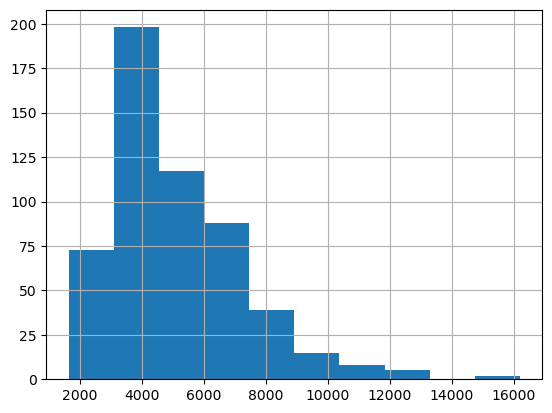

In [25]:
df['area'].hist()

# **Feature Engineering**

In [26]:
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
df1 = deepcopy(df)

In [27]:
# Normalizing the price and area into Normal Distribution using log2
df1['price'] = np.log2(df1['price'])
df1['area'] = np.log2(df1['area'])

<Axes: >

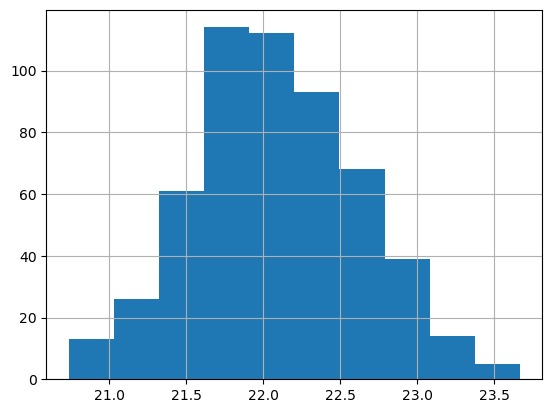

In [28]:
df1['price'].hist()

<Axes: >

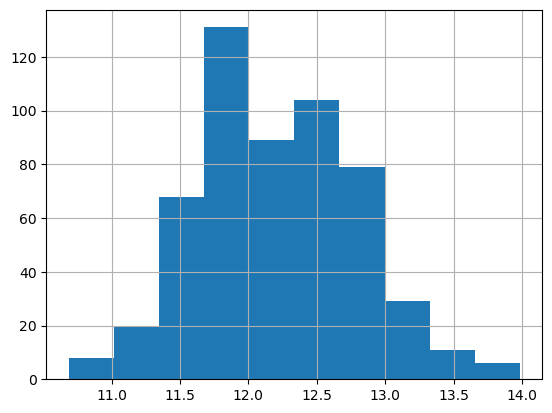

In [29]:
df1['area'].hist()

In [30]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,23.664923,12.857203,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,23.546278,13.129283,4,4,4,yes,no,no,no,yes,3,no,furnished
2,23.546278,13.281930,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,23.542151,12.872675,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,23.443795,12.857203,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
# Encoding mainroad, guestroom, and basement, using LabelEncoder
le = LabelEncoder()
df1['mainroad'] = le.fit_transform(df1['mainroad'])
df1['guestroom'] = le.fit_transform(df1['guestroom'])
df1['basement'] = le.fit_transform(df1['basement'])

In [32]:
# Encoding hotwaterheating, airconditioning, and prefarea using LabelEncoder
df1['hotwaterheating'] = le.fit_transform(df1['hotwaterheating'])
df1['airconditioning'] = le.fit_transform(df1['airconditioning'])
df1['prefarea'] = le.fit_transform(df1['prefarea'])

In [33]:
df1.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,23.664923,12.857203,4,2,3,1,0,0,0,1,2,1,furnished
1,23.546278,13.129283,4,4,4,1,0,0,0,1,3,0,furnished
2,23.546278,13.281930,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,23.542151,12.872675,4,2,2,1,0,1,0,1,3,1,furnished
4,23.443795,12.857203,4,1,2,1,1,1,0,1,2,0,furnished


In [34]:
# Encoding furnishingstatus using OneHotEncoder with ColumnTransformer
ct = ColumnTransformer(transformers=[
    (
        'encoder',
        OneHotEncoder(),
         ['furnishingstatus']
        )
    ],
                       remainder='passthrough'
                       )
df1 = ct.fit_transform(df1)
df1 = pd.DataFrame(df1,
                   columns=[
                       'furnished',
                       'semi-furnished',
                       'unfurnished',
                       'price',
                       'area',
                       'bedrooms',
                       'bathrooms',
                       'stories',
                       'mainroad',
                       'guestroom',
                       'basement',
                       'hotwaterheating',
                       'airconditioning',
                       'parking',
                       'prefarea'
                       ]
                   )

df1.head()

,furnished,semi-furnished,unfurnished,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.0,0.0,0.0,23.664923,12.857203,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
1,1.0,0.0,0.0,23.546278,13.129283,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,1.0,0.0,23.546278,13.281930,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3,1.0,0.0,0.0,23.542151,12.872675,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0
4,1.0,0.0,0.0,23.443795,12.857203,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0


# **Model selection and training**

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [36]:
predictors = df1[['furnished',
                  'semi-furnished',
                  'unfurnished',
                  'area',
                  'bedrooms',
                  'bathrooms',
                  'stories',
                  'mainroad',
                  'guestroom',
                  'basement',
                  'hotwaterheating',
                  'airconditioning',
                  'parking',
                  'prefarea']]

In [37]:
X = predictors
X

,furnished,semi-furnished,unfurnished,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
0,1.0,0.0,0.0,12.857203,4.0,2.0,3.0,1.0,0.0,0.0,0.0,1.0,2.0,1.0
1,1.0,0.0,0.0,13.129283,4.0,4.0,4.0,1.0,0.0,0.0,0.0,1.0,3.0,0.0
2,0.0,1.0,0.0,13.281930,3.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0,2.0,1.0
3,1.0,0.0,0.0,12.872675,4.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,3.0,1.0
4,1.0,0.0,0.0,12.857203,4.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.0,0.0,1.0,11.550747,2.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2.0,0.0
541,0.0,1.0,0.0,11.228819,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
542,0.0,0.0,1.0,11.821774,2.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
543,1.0,0.0,0.0,11.506803,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
y = df1[['price']]

In [39]:
y

,price
0,23.664923
1,23.546278
2,23.546278
3,23.542151
4,23.443795
...,...
540,20.795507
541,20.752993
542,20.738923
543,20.738923


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# **Model evaluation and fine-tuning**

In [41]:
# Applying LinearRegresion
lr = LinearRegression()
lr.fit(X_train, y_train)
# Predicting the Test set results
y_pred = lr.predict(X_test)

# Predicting the Accuracy Score of the Model
accuracy = lr.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculating the Root Squared Mean Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Accuracy: 0.6839470815801955
Mean Squared Error: 0.12304949965680242
Root Mean Squared Error: 0.3507841211583022


In [44]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

Ridge()

In [46]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1, 10, 100]}
ridge_model = Ridge()
clf = GridSearchCV(ridge_model, parameters, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), param_grid={'alpha': [0.1, 1, 10, 100]})

In [48]:
# Calculating the accuracy score of the model
accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

# Calculating the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculating the Root Squared Mean Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

Accuracy: 0.683416986741212
Mean Squared Error: 0.12325588251519745
Root Mean Squared Error: 0.3510781715162557
